## Topic Modelling on News Articles

## RSS feeds

In [61]:
feeds = [
    'http://www.sfgate.com/rss/feed/Tech-News-449.php',
    'http://feeds.feedburner.com/TechCrunch/startups',
    'http://news.cnet.com/8300-1001_3-92.xml',
    'http://www.zdnet.com/news/rss.xml',
    'http://www.computerweekly.com/rss/Latest-IT-news.xml',
    'http://feeds.reuters.com/reuters/technologyNews',
    'http://www.tweaktown.com/news-feed/'
]

## import 

In [62]:
import feedparser
import nltk
import string
import numpy as np
import re
from operator import itemgetter
import operator
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [63]:
## regular expression to capture html tags in text documents
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    """
    This function removes all the HTML tags from the text
    INPUT: text as string
    OUTPUT: text(string) with all HTML tags removed
    """
    return TAG_RE.sub('', text)

In [64]:
# Creating a corpus of news headlines and their description
corpus = []
titles=[]
content = []
ct = -1
for feed in feeds:
    d = feedparser.parse(feed)
    for e in d['entries']:
        content.append(remove_tags(e['description']))
        words = nltk.wordpunct_tokenize(remove_tags(e['description']))
        words.extend(nltk.wordpunct_tokenize(e['title']))
        lowerwords=[x.lower() for x in words if len(x) > 1]
        ct += 1
        #print(ct, "TITLE",e['title'])
        corpus.append(lowerwords)
        titles.append(e['title'])


## Removal of stopwords from contents

In [65]:
stop = set(stopwords.words('english'))
content_new = []
for c in content:
    temp = []
    for word in c.split(' '):
        if word not in stop:
            temp.append(word)
    content_new.append(temp)

content = [ " ".join(c) for c in content_new]

## Vectorize the data

Let's use tf-idf

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tfidf_vec = TfidfVectorizer(max_features=1000, max_df=0.95, min_df=3,stop_words='english')
vectorized = tfidf_vec.fit_transform(content)

In [68]:
print("Created document-term matrix of size {} x {}".format(vectorized.shape[0],
                                                            vectorized.shape[1]))

Created document-term matrix of size 125 x 216


## Scikit-learn's LDA

In [69]:
from sklearn.decomposition.online_lda import LatentDirichletAllocation

In [70]:
lda = LatentDirichletAllocation(n_topics=6,
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)

In [71]:
lda.fit(vectorized)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=6, perp_tol=0.1, random_state=42,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [75]:
def get_top_words(model, feature_names, n_top_words=50):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        #print("\nTopic #%d:" % topic_idx)
        topics.append(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    
    return topics
        
print("Topics in LDA model:")
tf_feature_names = tfidf_vec.get_feature_names()
lda_topics = get_top_words(lda, tf_feature_names)

for topic_idx, topic in enumerate(lda_topics):
    print("\nTopic #%d:" % topic_idx)
    print(topic)

Topics in LDA model:

Topic #0:
performance sales official forward gaming time company reuters uk remain team content platform year recently thursday open according business investors friday technologies 2016 board growing published strategy russian industry service 25 deal link online latest stories number ap better tell data software plans report help facebook tech early funding news

Topic #1:
new sent car click read browser tap based company using devices link rest upcoming online apps got nintendo mobile startup million funding wider 2017 series 8230 25 open smartphone today year san game led sales tech california raised run change allows email android startups work customers possible hellip ll google

Topic #2:
8217 read users year nbsp says way hellip isn company business google rest tap startup giant like using cloud android come browser new official fintech week link want different making internet deal really based microsoft nintendo introduced firm click months social report 

In [76]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [77]:
pyLDAvis.sklearn.prepare(lda, vectorized,tfidf_vec)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      25.691503        1       1  0.002526  0.003860
1      22.936267        1       2  0.004581 -0.002416
5      17.094166        1       3 -0.002970  0.001127
4      15.313667        1       4 -0.002322 -0.001294
3      11.024886        1       5 -0.001326 -0.001237
0       7.939511        1       6 -0.000488 -0.000041, topic_info=     Category      Freq          Term     Total  loglift  logprob
term                                                             
134   Default  1.000000   performance  1.000000  30.0000  30.0000
69    Default  1.000000       forward  1.000000  29.0000  29.0000
162   Default  1.000000         sales  1.000000  28.0000  28.0000
44    Default  1.000000          data  1.000000  27.0000  27.0000
196   Default  1.000000            uk  1.000000  26.0000  26.0000
192   Default  1.000000          time  1.000000  25.0000  25.0000
141   Default  1.000000     president  1.000000  24.0000  24.0000
157   Default  1.000000       reuters  1.000000  23.0000  23.0000
74    Default  1.000000        gaming  1.000000  22.0000  22.0000
160   Default  1.000000       russian  1.000000  21.0000  21.0000
2     Default  1.000000          2016  1.000000  20.0000  20.0000
187   Default  1.000000    technology  1.000000  19.0000  19.0000
115   Default  1.000000      managing  1.000000  18.0000  18.0000
147   Default  1.000000     published  1.000000  17.0000  17.0000
8     Default  1.000000         allow  1.000000  16.0000  16.0000
53    Default  1.000000        donald  1.000000  15.0000  15.0000
51    Default  1.000000       digital  1.000000  14.0000  14.0000
116   Default  1.000000         media  1.000000  13.0000  13.0000
129   Default  1.000000      official  1.000000  12.0000  12.0000
138   Default  1.000000      platform  1.000000  11.0000  11.0000
7     Default  1.000000     according  1.000000  10.0000  10.0000
194   Default  1.000000         tools  1.000000   9.0000   9.0000
185   Default  1.000000          tech  1.000000   8.0000   8.0000
191   Default  1.000000      thursday  1.000000   7.0000   7.0000
209   Default  1.000000            wi  1.000000   6.0000   6.0000
41    Default  1.000000       content  1.000000   5.0000   5.0000
175   Default  1.000000      software  1.000000   4.0000   4.0000
20    Default  1.000000        better  1.000000   3.0000   3.0000
184   Default  1.000000          team  1.000000   2.0000   2.0000
165   Default  1.000000      security  1.000000   1.0000   1.0000
...       ...       ...           ...       ...      ...      ...
41     Topic6  0.142078       content  1.423543   0.2288  -5.2054
160    Topic6  0.134670       russian  1.352021   0.2268  -5.2590
196    Topic6  0.146901            uk  1.487865   0.2180  -5.1720
184    Topic6  0.143535          team  1.462956   0.2117  -5.1952
192    Topic6  0.152958          time  1.565309   0.2076  -5.1316
191    Topic6  0.140309      thursday  1.449133   0.1984  -5.2179
181    Topic6  0.135051      strategy  1.398723   0.1957  -5.2561
71     Topic6  0.137450        friday  1.446719   0.1795  -5.2385
12     Topic6  0.132636            ap  1.410107   0.1695  -5.2742
186    Topic6  0.137347  technologies  1.471552   0.1618  -5.2393
189    Topic6  0.132343          tell  1.421770   0.1591  -5.2764
157    Topic6  0.148973       reuters  1.605911   0.1556  -5.1580
131    Topic6  0.139415          open  1.505370   0.1540  -5.2243
147    Topic6  0.135366     published  1.464834   0.1518  -5.2538
42     Topic6  0.124730        create  1.354653   0.1482  -5.3356
23     Topic6  0.136300         board  1.480513   0.1480  -5.2469
100    Topic6  0.133239        latest  1.456415   0.1417  -5.2696
96     Topic6  0.137501     investors  1.505500   0.1401  -5.2381
8      Topic6  0.125036         allow  1.373082   0.1371  -5.3332
7      Topic6  0.138509     according  1.530486   0.1309  -5.2308
126    Topic6  0.132916    

## Scikit-learn's NMF

In [78]:
from sklearn.decomposition import NMF

In [83]:
model = NMF(init="nndsvd",n_components=6,max_iter=200)
W = model.fit_transform(vectorized)
H = model.components_

In [84]:
print("Generated factor W of size {} and factor H of size {}".format(W.shape,H.shape))

Generated factor W of size (125, 6) and factor H of size (6, 216)


In [85]:
print("Topics in NMF model:")
tf_feature_names = tfidf_vec.get_feature_names()
nmf_topics = get_top_words(model, tf_feature_names)

for topic_idx, topic in enumerate(nmf_topics):
    print("\nTopic #%d:" % topic_idx)
    print(topic)

Topics in NMF model:

Topic #0:
link rest browser click tap using read run 2017 upcoming nintendo team new car ll smartphone different game series microsoft way hybrid public months power users instagram december work million year forces use security 25 ve introduced google isn know sent performance shows mobile facebook apps fast version open let

Topic #1:
8217 nbsp read hellip open really isn going 2016 year 8230 don startup buy maker today balance founder making know video offer stories companies major idea let simple startups features published like devices way building sent number ve help android familiar got bought fintech tools information valley silicon clear videos

Topic #2:
company million based like raised hellip nbsp world read funding online according round lets apps startup series app tech media board led recently 25 started taiwan san social possible allows friday facebook ceo founder forces simple services reuters china gaming wi products mobile idea make office shows

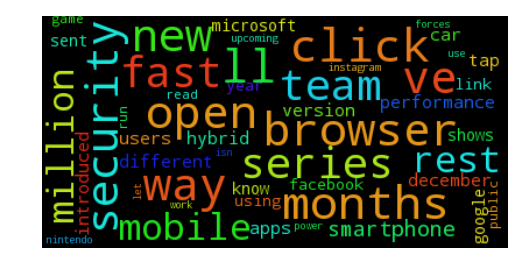

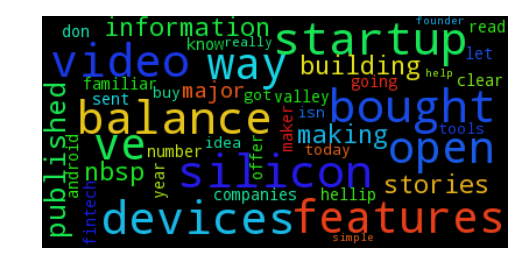

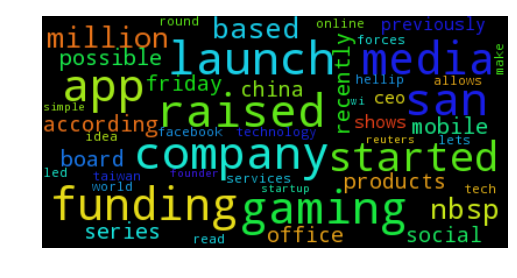

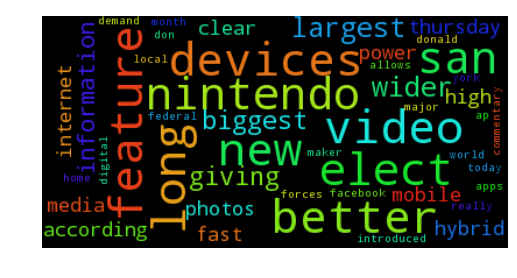

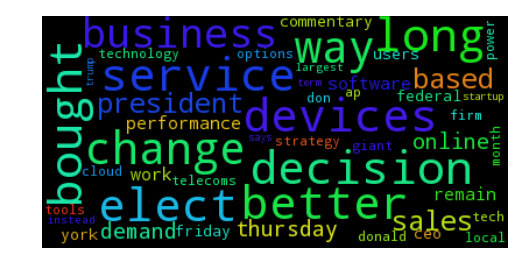

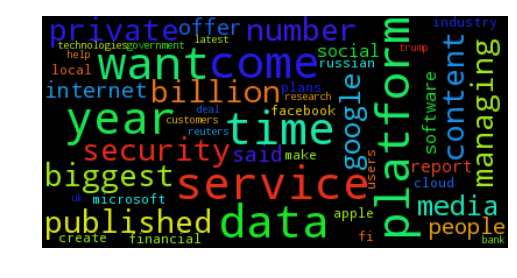

In [87]:
for topic in nmf_topics:
    wordcloud = WordCloud(max_font_size=40).generate(topic)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()